## Estudo de Classificação

In [927]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [928]:
data = pd.read_csv('../datasets/plants_model.csv')
data.head()

,family,categories,origin,climate,name,water_category,venomous,ind_pets,size,ind_apartment,soil,sunlight,water_category_code,size_code,soil_code,sunlight_code
0,Marantaceae,Hanging,Brazil,Tropical,Herringbone,weekly,0,1,small,1,Peat soils,Partial shade,2,2,1,2
1,Arecaceae,Palm,Mexico,Tropical,Bella palm,weekly,0,1,small,1,Sandy soils,Full sun,2,2,2,0
2,Araliaceae,Aralia,Asia,Tropical,Fabian Aralia,weekly,0,1,medium,1,Loamy soils,Partial shade,2,1,0,2
3,Liliaceae,Sansevieria,South Africa,Tropical,Snake plant,weekly,1,0,small,1,Loamy soils,Full sun,2,2,0,0
4,Araceae,Philodendron,Central America,Tropical,Parlor ivy,weekly,1,0,small,1,Silty and clay soils,Partial shade,2,2,3,2


Experiencia Indicada (baseado em soil, sunlight)
- Experiente
- Amador
- Novato

Disponibilidade (baseado em water_category, sunlight)
- Alta
- Média
- Baixa


In [929]:
list(data['soil'].unique())

['Peat soils', 'Sandy soils', 'Loamy soils', 'Silty and clay soils']

- Loamy soils – (fácil)
    - Solo equilibrado, boa drenagem e retenção, fácil de corrigir e manter.
- Peat soils – (moderado)
    - Retém bem umidade, mas pode encharcar e tem pH ácido. Requer ajustes.
- Sandy soils – (moderado)
    - Fácil de trabalhar, mas seca rápido e perde nutrientes fácil. Precisa de manutenção constante.
- Silty and clay soils – (difícil)
    - Tendem a compactar e encharcar. Exigem bastante correção e cuidado com drenagem.

In [930]:
soil_difficulty = {
    'Loamy soils': 'easy',
    'Peat soils': 'medium',
    'Sandy soils': 'medium',
    'Silty and clay soils': 'hard'
}

data['soil_diff'] = data['soil'].map(soil_difficulty)
data.head()

,family,categories,origin,climate,name,water_category,venomous,ind_pets,size,ind_apartment,soil,sunlight,water_category_code,size_code,soil_code,sunlight_code,soil_diff
0,Marantaceae,Hanging,Brazil,Tropical,Herringbone,weekly,0,1,small,1,Peat soils,Partial shade,2,2,1,2,medium
1,Arecaceae,Palm,Mexico,Tropical,Bella palm,weekly,0,1,small,1,Sandy soils,Full sun,2,2,2,0,medium
2,Araliaceae,Aralia,Asia,Tropical,Fabian Aralia,weekly,0,1,medium,1,Loamy soils,Partial shade,2,1,0,2,easy
3,Liliaceae,Sansevieria,South Africa,Tropical,Snake plant,weekly,1,0,small,1,Loamy soils,Full sun,2,2,0,0,easy
4,Araceae,Philodendron,Central America,Tropical,Parlor ivy,weekly,1,0,small,1,Silty and clay soils,Partial shade,2,2,3,2,hard


In [931]:
list(data['sunlight'].unique())

['Partial shade', 'Full sun', 'Full sun or partial shade']

- Partial shade - (fácil)
    - Ambiente estável, menos risco de desidratação ou queimadura. Ideal pra plantas tropicais como samambaias.

- Full sun - (difícil)
    - Precisa de rega constante, risco alto de queimadura, exige espécies bem adaptadas. Mudanças no clima afetam muito.

- Full sun or partial shade - (moderado)
    - Mais versátil, mas ainda exige atenção à adaptação da planta ao ambiente. Pode sofrer em extremos de calor ou sombra.

In [932]:
sunlight_difficulty = {
    'Full sun': 'hard',
    'Partial shade': 'easy',
    'Full sun or partial shade': 'medium'
}

data['sunlight_diff'] = data['sunlight'].map(sunlight_difficulty)
data.head()

,family,categories,origin,climate,name,water_category,venomous,ind_pets,size,ind_apartment,soil,sunlight,water_category_code,size_code,soil_code,sunlight_code,soil_diff,sunlight_diff
0,Marantaceae,Hanging,Brazil,Tropical,Herringbone,weekly,0,1,small,1,Peat soils,Partial shade,2,2,1,2,medium,easy
1,Arecaceae,Palm,Mexico,Tropical,Bella palm,weekly,0,1,small,1,Sandy soils,Full sun,2,2,2,0,medium,hard
2,Araliaceae,Aralia,Asia,Tropical,Fabian Aralia,weekly,0,1,medium,1,Loamy soils,Partial shade,2,1,0,2,easy,easy
3,Liliaceae,Sansevieria,South Africa,Tropical,Snake plant,weekly,1,0,small,1,Loamy soils,Full sun,2,2,0,0,easy,hard
4,Araceae,Philodendron,Central America,Tropical,Parlor ivy,weekly,1,0,small,1,Silty and clay soils,Partial shade,2,2,3,2,hard,easy


In [933]:
list(data['water_category'].unique())

['weekly', '7-10 days', '2-4 weeks']

In [934]:
water_difficulty = {
    'weekly': 'hard',
    '7-10 days': 'medium',
    '2-4 weeks': 'easy',
}

data['water_diff'] = data['water_category'].map(water_difficulty)
data.head()

,family,categories,origin,climate,name,water_category,venomous,ind_pets,size,ind_apartment,soil,sunlight,water_category_code,size_code,soil_code,sunlight_code,soil_diff,sunlight_diff,water_diff
0,Marantaceae,Hanging,Brazil,Tropical,Herringbone,weekly,0,1,small,1,Peat soils,Partial shade,2,2,1,2,medium,easy,hard
1,Arecaceae,Palm,Mexico,Tropical,Bella palm,weekly,0,1,small,1,Sandy soils,Full sun,2,2,2,0,medium,hard,hard
2,Araliaceae,Aralia,Asia,Tropical,Fabian Aralia,weekly,0,1,medium,1,Loamy soils,Partial shade,2,1,0,2,easy,easy,hard
3,Liliaceae,Sansevieria,South Africa,Tropical,Snake plant,weekly,1,0,small,1,Loamy soils,Full sun,2,2,0,0,easy,hard,hard
4,Araceae,Philodendron,Central America,Tropical,Parlor ivy,weekly,1,0,small,1,Silty and clay soils,Partial shade,2,2,3,2,hard,easy,hard


In [935]:
data_points = data.drop(columns=['family', 'categories', 'origin', 'climate', 'water_category', 'soil', 'sunlight', 'water_category_code', 'soil_code', 'sunlight_code'])
data_points.head()

,name,venomous,ind_pets,size,ind_apartment,size_code,soil_diff,sunlight_diff,water_diff
0,Herringbone,0,1,small,1,2,medium,easy,hard
1,Bella palm,0,1,small,1,2,medium,hard,hard
2,Fabian Aralia,0,1,medium,1,1,easy,easy,hard
3,Snake plant,1,0,small,1,2,easy,hard,hard
4,Parlor ivy,1,0,small,1,2,hard,easy,hard


In [936]:
data_points['soil_diff_code'] = data_points['soil_diff'].map({'easy': 1, 'medium': 2, 'hard': 3})
data_points['sunlight_diff_code'] = data_points['sunlight_diff'].map({'easy': 1, 'medium': 2, 'hard': 3})
data_points['water_diff_code'] = data_points['water_diff'].map({'easy': 1, 'medium': 2, 'hard': 3})
data_points.head()

,name,venomous,ind_pets,size,ind_apartment,size_code,soil_diff,sunlight_diff,water_diff,soil_diff_code,sunlight_diff_code,water_diff_code
0,Herringbone,0,1,small,1,2,medium,easy,hard,2,1,3
1,Bella palm,0,1,small,1,2,medium,hard,hard,2,3,3
2,Fabian Aralia,0,1,medium,1,1,easy,easy,hard,1,1,3
3,Snake plant,1,0,small,1,2,easy,hard,hard,1,3,3
4,Parlor ivy,1,0,small,1,2,hard,easy,hard,3,1,3


### Definindo Nível Indicado de Experiência e Disponibilidade

In [937]:
def define_experience_level(row):
    exp_points = row['soil_diff_code'] + row['sunlight_diff_code'] 
    
    if exp_points <= 2:
        return 'Begginer'
    elif 3 <= exp_points <= 4:
        return 'Amateur'
    else:
        return 'Experienced'


data_points['experience_level'] = data_points.apply(define_experience_level, axis=1)
data_points.head()

,name,venomous,ind_pets,size,ind_apartment,size_code,soil_diff,sunlight_diff,water_diff,soil_diff_code,sunlight_diff_code,water_diff_code,experience_level
0,Herringbone,0,1,small,1,2,medium,easy,hard,2,1,3,Amateur
1,Bella palm,0,1,small,1,2,medium,hard,hard,2,3,3,Experienced
2,Fabian Aralia,0,1,medium,1,1,easy,easy,hard,1,1,3,Begginer
3,Snake plant,1,0,small,1,2,easy,hard,hard,1,3,3,Amateur
4,Parlor ivy,1,0,small,1,2,hard,easy,hard,3,1,3,Amateur


In [938]:
def define_disponibility_level(row):
    disp_points = row['water_diff_code'] + row['sunlight_diff_code'] 
    
    if disp_points <= 2:
        return 'Low'
    elif 2 < disp_points < 5:
        return 'Medium'
    else:
        return 'High'
    
data_points['disponibility_level'] = data_points.apply(define_disponibility_level, axis=1)
data_points.head()

,name,venomous,ind_pets,size,ind_apartment,size_code,soil_diff,sunlight_diff,water_diff,soil_diff_code,sunlight_diff_code,water_diff_code,experience_level,disponibility_level
0,Herringbone,0,1,small,1,2,medium,easy,hard,2,1,3,Amateur,Medium
1,Bella palm,0,1,small,1,2,medium,hard,hard,2,3,3,Experienced,High
2,Fabian Aralia,0,1,medium,1,1,easy,easy,hard,1,1,3,Begginer,Medium
3,Snake plant,1,0,small,1,2,easy,hard,hard,1,3,3,Amateur,High
4,Parlor ivy,1,0,small,1,2,hard,easy,hard,3,1,3,Amateur,Medium


In [939]:
data_info = data_points.drop(columns=['venomous', 'soil_diff', 'soil_diff_code', 'sunlight_diff', 'sunlight_diff_code', 'water_diff', 'water_diff_code'])
data_info.to_csv('../datasets/plants_info.csv', index=False)
data_info.head()

,name,ind_pets,size,ind_apartment,size_code,experience_level,disponibility_level
0,Herringbone,1,small,1,2,Amateur,Medium
1,Bella palm,1,small,1,2,Experienced,High
2,Fabian Aralia,1,medium,1,1,Begginer,Medium
3,Snake plant,0,small,1,2,Amateur,High
4,Parlor ivy,0,small,1,2,Amateur,Medium


## Agrupamento das Plantas

### Codificação e Normalização dos Dados

In [940]:
data_coded = data_info.copy()  

data_coded['experience_level_code'] = data_coded['experience_level'].map({'Begginer': 1, 'Amateur': 2, 'Experienced': 3})
data_coded['disponibility_level_code'] = data_coded['disponibility_level'].map({'Low': 1, 'Medium': 2, 'High': 3})
data_coded.drop(columns=['size', 'experience_level', 'disponibility_level'], inplace=True)
data_coded.head()


,name,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code
0,Herringbone,1,1,2,2,2
1,Bella palm,1,1,2,3,3
2,Fabian Aralia,1,1,1,1,2
3,Snake plant,0,1,2,2,3
4,Parlor ivy,0,1,2,2,2


In [941]:
data_ml = data_coded.copy()
data_ml.drop(columns=['name'], inplace=True)

data_ml.head()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code
0,1,1,2,2,2
1,1,1,2,3,3
2,1,1,1,1,2
3,0,1,2,2,3
4,0,1,2,2,2


In [942]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_ml_normalized = scaler.fit_transform(data_ml)

data_ml_normalized = pd.DataFrame(data_ml_normalized, columns=data_ml.columns)
data_ml_normalized.head()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code
0,1.0,1.0,0.666667,0.5,0.0
1,1.0,1.0,0.666667,1.0,1.0
2,1.0,1.0,0.333333,0.0,0.0
3,0.0,1.0,0.666667,0.5,1.0
4,0.0,1.0,0.666667,0.5,0.0


### Aplicando o Modelo

Text(0.5, 1.0, 'Elbow Method')

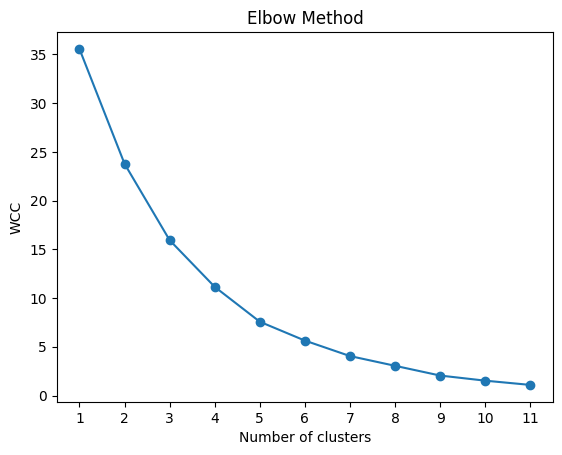

In [943]:
from sklearn.cluster import KMeans

wcss = [] 

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init=10, max_iter=1000)
    kmeans.fit(data_ml_normalized)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 12), wcss, marker='o')
plt.xticks(range(1, 12))
plt.xlabel('Number of clusters')
plt.ylabel('WCC')
plt.title('Elbow Method')


In [944]:

n_clusters = 6

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_pred = kmeans.fit_predict(data_ml_normalized)

data_ml_normalized['kmeans_group'] = kmeans_pred
data_ml_normalized.head()


,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code,kmeans_group
0,1.0,1.0,0.666667,0.5,0.0,1
1,1.0,1.0,0.666667,1.0,1.0,2
2,1.0,1.0,0.333333,0.0,0.0,1
3,0.0,1.0,0.666667,0.5,1.0,0
4,0.0,1.0,0.666667,0.5,0.0,0


## Resultados

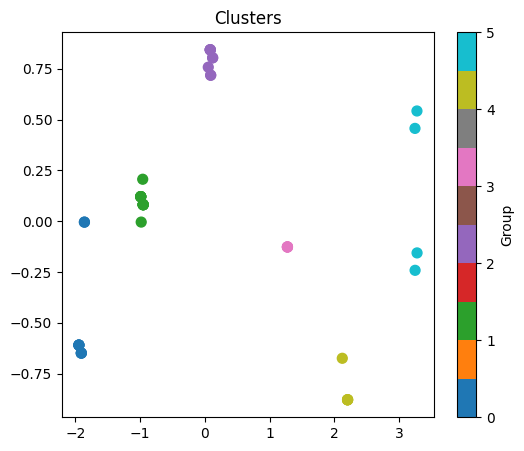

In [957]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_ml_normalized)

plt.figure(figsize=(6, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data_ml_normalized['kmeans_group'], cmap='tab10', s=50)
plt.colorbar(label='Group')
plt.title('Clusters')
plt.show()

In [946]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_ml_normalized, data_ml_normalized['kmeans_group'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7442277305136767


In [961]:
data_grouped = data_ml_normalized.copy()
data_grouped['name'] = data_coded['name']
data_grouped.head()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code,kmeans_group,name
0,1.0,1.0,0.666667,0.5,0.0,1,Herringbone
1,1.0,1.0,0.666667,1.0,1.0,2,Bella palm
2,1.0,1.0,0.333333,0.0,0.0,1,Fabian Aralia
3,0.0,1.0,0.666667,0.5,1.0,0,Snake plant
4,0.0,1.0,0.666667,0.5,0.0,0,Parlor ivy


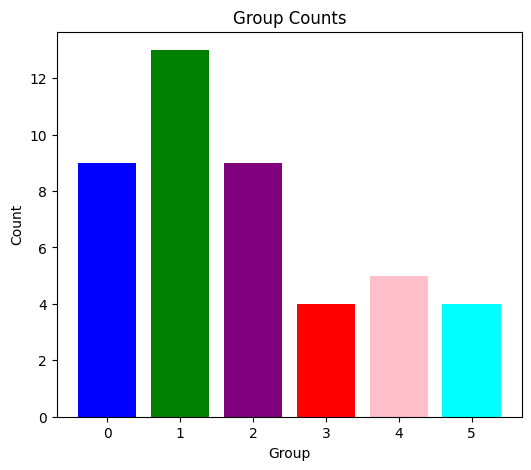

In [963]:
# plot the groups counts
plt.figure(figsize=(6, 5))
colors = ['blue', 'green', 'purple', 'red', 'pink', 'cyan']  # Define a color for each group
group_counts = data_grouped['kmeans_group'].value_counts()
plt.bar(group_counts.index, group_counts, color=[colors[i] for i in group_counts.index])
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Group Counts')
plt.xticks(group_counts.index)
plt.show()